### <U> PROJECT </U> : 
### Goal: Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

### Gathering Data

#### i) Downloading image-predictions file

In [189]:
import requests

In [190]:
url=" https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

In [191]:
with open("image_predictions.tsv",mode='wb') as file:
    file.write(response.content)

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [193]:
ip=pd.read_csv("image_predictions.tsv",sep="\t")

In [194]:
ip.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 2. Twitter API file

# Using API code :
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

#### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
#### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [195]:
import json

In [196]:
tweet=pd.read_json("tweet-json.txt",lines=True)

In [197]:
tweet.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


#### 3. twitter-archive-enhanced file

In [198]:
archive=pd.read_csv("twitter-archive-enhanced.csv")

In [199]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Columns description
For detailed column description click on the links below:<br>
**1.** [Description on twitter](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) <br>
**2.** [sfm](https://sfm.readthedocs.io/en/1.4.3/data_dictionary.html)

# Accessing Data

### 1. archive Dataset

In [200]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [201]:
#Statistical Reference
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [202]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [203]:
#Finiding null values in dataset
archive.isnull().sum()


tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [204]:
#Duplicate Values
archive[archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Checking rating_numerator and rating_denominator

In [205]:
archive[archive.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [206]:
archive[archive.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [207]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [208]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [209]:
#Dogs Names- Not Known
archive[archive.name=="None"].name.value_counts()

None    745
Name: name, dtype: int64

In [210]:
#Checking the dog names
dogs = []
dogs= archive['name'].unique()
dogs.sort()
dogs

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

###  Dataset Issues:
**i.QUALITY :**<BR>
    1. Missing values in [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, expanded_urls] columns <br>
    2. Rating_numerator and rating_denominator have some inconsistent values in the numerator and denominator.<br>
    3. tweet id 835246439529840640 has a rating of denominator = 0<br>
    4. in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id must be integers instead of float ( They have id's similar to tweet_id)
    5. timestamp and retweeted_status_timestamp are object but they should be datetime.<br>
    6. The columns doggo, floofer, pupper, puppo have missing values has None instead of NaN
    7. Dogs name such as - 'a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such','the', 'this', 'unacceptable','very' are not likely.
**ii.Tidiness :**<BR> 
    1. Dog stages are found in multiple columns, They should be passed in under single column. This will reduce the dimensionality of the dataframe
    
    

### 2. tweet Dataset 

In [211]:
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [212]:
tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [213]:
tweet.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [214]:
#Checking for duplicates
tweet[tweet.id.duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


In [215]:
#Finding Retweet
tweet[tweet.retweeted_status.notna()==True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,2016-06-25 01:52:36+00:00,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN
1041,2016-06-17 16:01:16+00:00,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN
1240,2016-03-21 19:31:59+00:00,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN
2257,2015-11-20 03:51:52+00:00,667550904950915073,667550904950915072,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN


In [216]:
#Finding reply Tweet
tweet[tweet.in_reply_to_status_id.notna()==True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
29,2017-07-15 16:51:35+00:00,886267009285017600,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,False,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.862664e+17,...,117,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
54,2017-07-02 21:58:53+00:00,881633300179243008,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,False,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.816070e+17,...,129,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
63,2017-06-27 12:14:36+00:00,879674319642796034,879674319642796032,@RealKentMurphy 14/10 confirmed,False,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.795538e+17,...,315,True,False,NaN,NaN,en,NaN,NaN,NaN,NaN
112,2017-06-02 19:38:25+00:00,870726314365509632,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,False,"[30, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.707262e+17,...,121,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
147,2017-05-13 16:15:35+00:00,863427515083354112,863427515083354112,@Jack_Septic_Eye I'd need a few more pics to p...,False,"[17, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.634256e+17,...,2363,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,2015-12-01 04:44:10+00:00,671550332464455680,671550332464455680,After 22 minutes of careful deliberation this ...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.715449e+17,...,967,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
2147,2015-11-26 01:11:28+00:00,669684865554620416,669684865554620416,After countless hours of research and hundreds...,False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.693544e+17,...,551,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
2167,2015-11-25 03:14:30+00:00,669353438988365824,669353438988365824,This is Tessa. She is also very pleased after ...,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669353426984296449, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",6.678065e+17,...,687,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2187,2015-11-24 01:42:25+00:00,668967877119254528,668967877119254528,12/10 good shit Bubka\n@wane15,False,"[0, 29]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",6.689207e+17,...,161,False,False,NaN,NaN,tl,NaN,NaN,NaN,NaN


In [217]:
tweet.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

###  Dataset Issues:
**i.QUALITY :**<BR>
    1. Missing values in [geo, coordinates, place, contributors, possibly_sensitive, possibly_sensitive_appealable, retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, extended_entities ] columns 
    2. We need to remove retweet and replay 

**ii.Tidiness :**<BR> 
    1. User column has data in dictionaries and have several unrequired data stored, we need followers_count separatedly so we can access them easily.
    2. Retweets and Favorites has to be joined to the archive data table, becuase all the tweets information is found there.
   

### image-predictions(ip) Dataset

In [218]:
ip.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [219]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [220]:
#Checking for duplicate
ip[ip.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [221]:
#Null Values
ip.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

###  Dataset Issues:
**i.QUALITY :**<BR>
    1. Only 2075 tweet_id have images. <br>

**ii.Tidiness :**<BR> 
    1. All the prediction outputs from different algorithms have to be joined with archive and tweet.
    

### Creating Copy of Orginal Datasets

In [222]:
tweet_clean=tweet.copy()
archive_clean=archive.copy()
ip_clean=ip.copy()

## Cleaning
### Tweet Dataset

### Finding retweets and removing

In [223]:
tweet_clean[tweet_clean.retweeted_status.notna()==True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,2017-07-15 02:45:48+00:00,886054160059072513,886054160059072512,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,8.860534e+17,NaN
35,2017-07-13 01:35:06+00:00,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN
67,2017-06-26 00:13:58+00:00,879130579576475649,879130579576475648,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
72,2017-06-24 00:09:53+00:00,878404777348136964,878404777348136960,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN
73,2017-06-23 18:17:33+00:00,878316110768087041,878316110768087040,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,2016-06-25 01:52:36+00:00,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN
1041,2016-06-17 16:01:16+00:00,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN
1240,2016-03-21 19:31:59+00:00,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN
2257,2015-11-20 03:51:52+00:00,667550904950915073,667550904950915072,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN


In [224]:
tweet_clean.drop(tweet_clean[tweet_clean.retweeted_status.notna()==True].index,inplace=True)

In [225]:
tweet_clean[tweet_clean.retweeted_status.notna()==True]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


In [226]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   id                             2175 non-null   int64              
 2   id_str                         2175 non-null   int64              
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [227]:
tweet_clean.drop(["created_at",'id_str','display_text_range',"entities","is_quote_status","possibly_sensitive","possibly_sensitive_appealable",'favorited','retweeted','retweeted_status','quoted_status_id','quoted_status_id_str','quoted_status','lang','truncated','source','geo','coordinates','place','contributors','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name',"extended_entities"],axis=1,inplace=True)

In [228]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Finding Reply Tweet and removing it.

In [229]:
tweet_clean[tweet_clean.in_reply_to_status_id.notna()==True]

,id,full_text,in_reply_to_status_id,user,retweet_count,favorite_count
29,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,8.862664e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4,117
54,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,8.816070e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",7,129
63,879674319642796034,@RealKentMurphy 14/10 confirmed,8.795538e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",10,315
112,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,8.707262e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",3,121
147,863427515083354112,@Jack_Septic_Eye I'd need a few more pics to p...,8.634256e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",105,2363
...,...,...,...,...,...,...
2036,671550332464455680,After 22 minutes of careful deliberation this ...,6.715449e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",229,967
2147,669684865554620416,After countless hours of research and hundreds...,6.693544e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",99,551
2167,669353438988365824,This is Tessa. She is also very pleased after ...,6.678065e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",281,687
2187,668967877119254528,12/10 good shit Bubka\n@wane15,6.689207e+17,"{'id': 4196983835, 'id_str': '4196983835', 'na...",25,161


In [230]:
tweet_clean.drop(tweet_clean[tweet_clean.in_reply_to_status_id.notna()==True].index,inplace=True)

In [231]:
tweet_clean[tweet_clean.in_reply_to_status_id.notna()==True]

,id,full_text,in_reply_to_status_id,user,retweet_count,favorite_count


In [232]:
tweet_clean.drop("in_reply_to_status_id",axis=1,inplace=True)

In [233]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2097 non-null   int64 
 1   full_text       2097 non-null   object
 2   user            2097 non-null   object
 3   retweet_count   2097 non-null   int64 
 4   favorite_count  2097 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 98.3+ KB


In [234]:
tweet_clean.user[0]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs™ (author)',
 'screen_name': 'dog_rates',
 'location': 'DM YOUR DOGS, WE WILL RATE',
 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 3200889,
 'friends_count': 104,
 'listed_count': 2784,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 114031,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 5288,
 'lang': 'en',
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'prof

In [235]:
#Finding overall followers
tweet_clean["followers_counttweet"]=tweet_clean.user.apply(lambda x:x['followers_count'])

In [236]:
tweet_clean.drop("user",axis=1,inplace=True)

 #### Finding Duplicate

In [237]:
tweet_clean[tweet_clean.duplicated()]

,id,full_text,retweet_count,favorite_count,followers_counttweet


### Changing column name 'id' to 'tweet_id'

In [238]:
tweet_clean.rename(columns={"id" : "tweet_id"},inplace=True)

###  2. Archive Dataset

In [239]:
archive_clean.drop(["in_reply_to_status_id","in_reply_to_user_id","source","retweeted_status_id","text","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","expanded_urls"],axis=1,inplace=True)

###  Creating Dog Stages column

In [240]:
archive_clean["stages"]=archive.apply(lambda x: x.doggo if x.doggo=="doggo" else ("floofer" if x.floofer=="floofer" else ("pupper" if x.pupper=="pupper" else ("puppo" if x.puppo=="puppo" else "None"))),axis=1)

In [241]:
archive_clean.drop(["doggo","floofer","pupper","puppo"],axis=1,inplace=True)

In [242]:
archive_clean[archive_clean.stages!="None"]

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stages
9,890240255349198849,2017-07-26 15:59:51 +0000,14,10,Cassie,doggo
12,889665388333682689,2017-07-25 01:55:32 +0000,13,10,None,puppo
14,889531135344209921,2017-07-24 17:02:04 +0000,13,10,Stuart,puppo
29,886366144734445568,2017-07-15 23:25:31 +0000,12,10,Roscoe,pupper
43,884162670584377345,2017-07-09 21:29:42 +0000,12,10,Yogi,doggo
...,...,...,...,...,...,...
1995,672594978741354496,2015-12-04 01:55:13 +0000,9,10,Scott,pupper
2002,672481316919734272,2015-12-03 18:23:34 +0000,12,10,Jazz,pupper
2009,672254177670729728,2015-12-03 03:21:00 +0000,11,10,Rolf,pupper
2015,672205392827572224,2015-12-03 00:07:09 +0000,9,10,Opal,pupper


### Changing timestamp object to datetime

In [243]:
archive_clean["timestamp"] = pd.to_datetime(archive_clean.timestamp)

In [244]:
archive_clean.query("name in ['a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such','the', 'this', 'unacceptable','very']").replace(archive.name,"Unknown")

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stages
22,887517139158093824,2017-07-19 03:39:09+00:00,14,10,such,None
56,881536004380872706,2017-07-02 15:32:16+00:00,14,10,a,pupper
118,869988702071779329,2017-05-31 18:47:24+00:00,12,10,quite,None
169,859196978902773760,2017-05-02 00:04:57+00:00,12,10,quite,None
193,855459453768019968,2017-04-21 16:33:22+00:00,12,10,quite,None
...,...,...,...,...,...,...
2349,666051853826850816,2015-11-16 00:35:11+00:00,2,10,an,None
2350,666050758794694657,2015-11-16 00:30:50+00:00,10,10,a,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,6,10,a,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,9,10,a,None


### Changing unacceptable names to "unknown"

In [245]:
cr_name=["None",'a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such','the', 'this', 'unacceptable','very']
archive_clean.name=archive_clean.name.apply(lambda x:"Unknown" if (x in cr_name) else x)


In [246]:
archive_clean.query("name in ['a', 'actually', 'all', 'an', 'by', 'getting','his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such','the', 'this', 'unacceptable','very']").replace(archive.name,"Unknown")


,tweet_id,timestamp,rating_numerator,rating_denominator,name,stages


In [247]:
merge1=tweet_clean.merge(archive_clean,how='inner').reset_index(drop=True)

In [248]:
merge1=merge1.merge(ip_clean,how='inner').reset_index(drop=True)


In [249]:
#Complete Dataset
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1971 non-null   int64              
 1   full_text             1971 non-null   object             
 2   retweet_count         1971 non-null   int64              
 3   favorite_count        1971 non-null   int64              
 4   followers_counttweet  1971 non-null   int64              
 5   timestamp             1971 non-null   datetime64[ns, UTC]
 6   rating_numerator      1971 non-null   int64              
 7   rating_denominator    1971 non-null   int64              
 8   name                  1971 non-null   object             
 9   stages                1971 non-null   object             
 10  jpg_url               1971 non-null   object             
 11  img_num               1971 non-null   int64              
 12  p1    

### Fixing  Non-Integer rating_numerator Issue

In [250]:
pattern = "(\d+\.\d+\/\d+)"

merge1.full_text.str.extract(pattern, expand = True)[0].dropna()

39       13.5/10
499      9.75/10
549     11.27/10
1359    11.26/10
Name: 0, dtype: object

In [251]:
num = merge1.full_text.str.extract(pattern, expand = True)[0].dropna().str.split('/', n=1, expand=True)[0]

In [252]:
num_index = num.index
num_values = num.values.astype("float64")

In [253]:
merge1.rating_numerator = merge1.rating_numerator.astype("float64")
merge1.rating_denominator = merge1.rating_denominator.astype("float64")
merge1.loc[num_index, "rating_numerator"] = num_values
merge1.loc[num_index].rating_numerator

39      13.50
499      9.75
549     11.27
1359    11.26
Name: rating_numerator, dtype: float64

##  *Storing the Cleaned Dataset*

In [254]:
merge1.to_csv('twitter_archive_master.csv', index=False)

### Analyzing Data

Text(0.5, 1.0, 'Favorite Count Histogram')

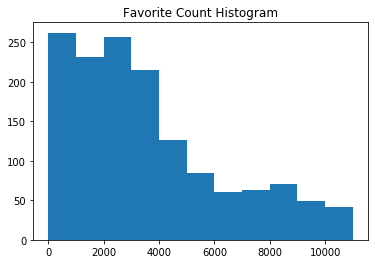

In [255]:
plt.hist(merge1.favorite_count,bins=np.arange(0,12000,1000))
plt.title("Favorite Count Histogram")

Text(0.5, 1.0, 'Retweet Count Histogram')

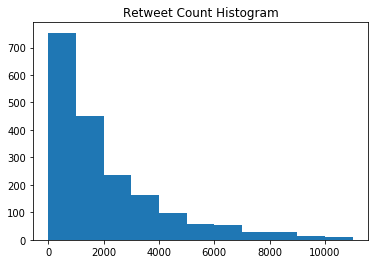

In [256]:
plt.hist(merge1.retweet_count,bins=np.arange(0,12000,1000))
plt.title("Retweet Count Histogram")

### Top 10 based on favorite count

In [257]:
top=merge1.sort_values(by=['favorite_count'],ascending=False).reset_index(drop=True)
top10=top[:10]
top10[["tweet_id","full_text","favorite_count","name","jpg_url"]]


,tweet_id,full_text,favorite_count,name,jpg_url
0,822872901745569793,Here's a super supportive puppo participating ...,132810,Unknown,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
1,744234799360020481,Here's a doggo realizing you can stand in a po...,131075,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/74423...
2,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,107956,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/87941...
3,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,107015,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...
4,866450705531457537,This is Jamesy. He gives a kiss to every other...,106827,Jamesy,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
5,819004803107983360,This is Bo. He was a very good First Doggo. 14...,95450,Bo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
6,870374049280663552,This is Zoey. She really likes the planet. Wou...,85011,Zoey,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg
7,806629075125202948,"""Good afternoon class today we're going to lea...",75639,Unknown,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
8,859196978902773760,We only rate dogs. This is quite clearly a smo...,75193,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/85919...
9,739238157791694849,Here's a doggo blowing bubbles. It's downright...,75163,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/73923...


In [258]:
print(top10.full_text[0])
top10.jpg_url[0]

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc


'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg'

### Top 10 based on retweet_count

In [259]:
retop=merge1.sort_values(by=['retweet_count'],ascending=False).reset_index(drop=True)
retop10=retop[:10]
retop10[["tweet_id","full_text","retweet_count","name","jpg_url"]]

,tweet_id,full_text,retweet_count,name,jpg_url
0,744234799360020481,Here's a doggo realizing you can stand in a po...,79515,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/74423...
1,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,56625,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/80710...
2,739238157791694849,Here's a doggo blowing bubbles. It's downright...,52360,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/73923...
3,822872901745569793,Here's a super supportive puppo participating ...,48265,Unknown,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
4,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,45849,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/87941...
5,819004803107983360,This is Bo. He was a very good First Doggo. 14...,42228,Bo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
6,806629075125202948,"""Good afternoon class today we're going to lea...",37911,Unknown,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
7,761672994376806400,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,33421,Unknown,https://pbs.twimg.com/ext_tw_video_thumb/76167...
8,866450705531457537,This is Jamesy. He gives a kiss to every other...,32883,Jamesy,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
9,676219687039057920,This is Kenneth. He's stuck in a bubble. 10/10...,31989,Kenneth,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg


In [260]:
print(retop10.jpg_url[0])
print(retop10.full_text[0])

https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


### Time period of Dataset 

In [261]:
(merge1.timestamp[len(merge1)-1],merge1.timestamp[0])

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

### Change in No. of Followers during the time period '2015-11-15 22:32:08' - '2017-08-01 16:23:56'

In [262]:
merge1.followers_counttweet[0]-merge1.followers_counttweet[len(merge1)-1]

-129

**Note:** The number of followers decreased by 129.

### Number of tweets without dog names

In [263]:
named=merge1[merge1.name=="unknown"].tweet_id.count()
unnamed=merge1.shape[0]-named
unnamed

1971

**Note:** There are 1349 tweets without dog name.

### Correlation between numeric columns [retweet_count	,favorite_count, rating_numerator]

In [264]:
column=["retweet_count","favorite_count", "rating_numerator"]
merge1[column].corr()

,retweet_count,favorite_count,rating_numerator
retweet_count,1.000000,0.913014,0.014238
favorite_count,0.913014,1.000000,0.010596
rating_numerator,0.014238,0.010596,1.000000


### Heatmap for correlation

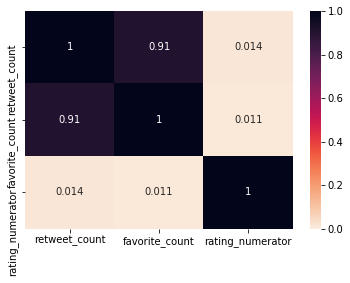

In [265]:
sns.heatmap(merge1[column].corr(),cmap="rocket_r",annot=True,vmin=0)

**Note:** There is strong correlation between retweet counts and favorite counts. 

Text(0, 0.5, 'Favorites')

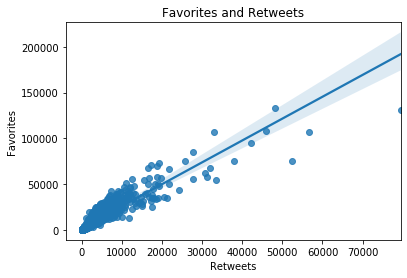

In [161]:
graph = sns.regplot(x=merge1.retweet_count, y=merge1.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')

**Note:** As the number of retweets increases, the number of favorites also increases. 